#Introduction

This notebook will present some of the most popular models for classification in Machine Learning like Logistic Regression, K-Nearest Neighbor, Support Vector Machines, Decision Trees and DNN. For this purpose, I'll use a dataset containing different characteristics of patients to predict heart failures.

#Preprocessing the Data

In [ ]:
#import Libraries
from sklearn import model_selection,metrics,preprocessing,linear_model,tree,svm,datasets,neighbors
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 

In [ ]:
#load heart dataset 
data=pd.read_csv('/content/heart.csv')
data.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#describe a DataFream and info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Do we have duplicates?
print('Number of Duplicates:', len(data[data.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', data.isnull().sum().sum())

Number of Duplicates: 0
Number of Missing Values: 0


In [ ]:
#Convert text values to numerical values in (RestingECG,ChestPainType,ExerciseAngina,ST_Slope,Sex)
def convert_text_to_num(x):
  set_x=set(x)
  index_w={}
  w_index={}
  for i,w in enumerate(set_x):
    index_w[i]=w
    w_index[w]=i
  x=x.replace(w_index)
  return x,w_index,index_w 

In [ ]:
data.RestingECG,RestingECG_1_w_index,RestingECG_1_w_index=convert_text_to_num(data.RestingECG)
data.ChestPainType,ChestPainType_1_w_index,ChestPainType_1_w_index=convert_text_to_num(data.ChestPainType)
data.ExerciseAngina,ExerciseAngina_1_w_index,ExerciseAngina_1_w_index=convert_text_to_num(data.ExerciseAngina)
data.ST_Slope,ST_Slope_1_w_index,ST_Slope_1_w_index=convert_text_to_num(data.ST_Slope)
data.Sex,Sex_1_w_index,Sex_1_w_index=convert_text_to_num(data.Sex)

In [ ]:
# Set up X and y variables
x=data.iloc[:,0:11] #Split the data  inputs(features (x))
print('feauter are : ','\n' ,x)

y=data.iloc[:,11:]#split the data output(target(y))
print('target is:','\n' ,y)

feauter are :  
      Age  Sex  ChestPainType  ...  ExerciseAngina  Oldpeak  ST_Slope
0     40    0              1  ...               1      0.0         0
1     49    1              0  ...               1      1.0         2
2     37    0              1  ...               1      0.0         0
3     48    1              2  ...               0      1.5         2
4     54    0              0  ...               1      0.0         0
..   ...  ...            ...  ...             ...      ...       ...
913   45    0              3  ...               1      1.2         2
914   68    0              2  ...               1      3.4         2
915   57    0              2  ...               0      1.2         2
916   57    1              1  ...               1      0.0         2
917   38    0              0  ...               1      0.0         0

[918 rows x 11 columns]
target is: 
      HeartDisease
0               0
1               1
2               0
3               1
4               0
..       

(array([[9., 0., 2., ..., 0., 0., 0.],
        [9., 0., 2., ..., 0., 0., 0.],
        [9., 1., 1., ..., 0., 0., 0.],
        ...,
        [9., 1., 2., ..., 0., 0., 0.],
        [9., 0., 2., ..., 0., 0., 0.],
        [9., 0., 3., ..., 0., 0., 0.]]),
 array([ -2.6 ,  57.96, 118.52, 179.08, 239.64, 300.2 , 360.76, 421.32,
        481.88, 542.44, 603.  ]),
 <a list of 918 Lists of Patches objects>)

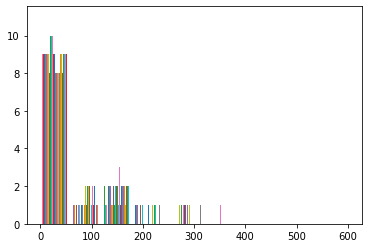

In [ ]:
plt.hist(data) #show the histogram 

In [ ]:
#normalization for features
x_normalizer=preprocessing.StandardScaler()
x_norm=x_normalizer.fit_transform(x)


In [ ]:
# Split the data into training and test samples
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.1,random_state=42,stratify=y)
print('x_train :',x_train.shape), print('y_train: ',y_train.shape)
print('x_test :',x_test.shape), print('y_test :',y_test.shape)


x_train : (826, 11)
y_train:  (826, 1)
x_test : (92, 11)
y_test : (92, 1)


(None, None)

#Modelling

#1- KNN

In [ ]:
#create KNN Classifier
neig=neighbors.KNeighborsClassifier(n_neighbors=12,metric= 'manhattan')
#train the model
neig.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:

scoring = {
    'accuracy': metrics.make_scorer(metrics.accuracy_score),
    'precision': metrics.make_scorer(metrics.precision_score), 
    'recall': metrics.make_scorer(metrics.recall_score)
    }
   
params = {'n_neighbors' :[1 ,2,3,4,5,6,7,8,9,10],
          'metric' :['euclidean','manhattan','minkowski'],
          'weights':['uniform', 'distance']

          
          
 

    
          }
   

gs = model_selection.GridSearchCV(neig, params, scoring=scoring, refit='recall', verbose=2)

In [ ]:
gs.fit(x_norm,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=eu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y

[CV] . metric=euclidean, n_neighbors=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=2, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=euclidean, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=4, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=6, weights=uniform ................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=euclidean, n_neighbors=6, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=7, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=7, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=euclidean, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=euclidean, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=10, weights=uniform ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=manhattan, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=manhattan, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=4, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=4, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=4, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=4, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=4, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=4, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=manhattan, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=6, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=manhattan, n_neighbors=6, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=6, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=manhattan, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=10, weights=uniform ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=manhattan, n_neighbors=10, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=minkowski, n_neighbors=2, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=2, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=2, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=2, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=2, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=2, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=2, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=2, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=2, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=minkowski, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=4, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=minkowski, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=6, weights=uniform ................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=minkowski, n_neighbors=6, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=7, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=distance ...............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV] . metric=minkowski, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=8, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=9, weights=uniform ................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[CV]  metric=minkowski, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=9, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=distance ..............
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='manhattan',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=12, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=False,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=2)

In [ ]:
print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
#predict output
y_pred=neig.predict(x_test)

##testing

accuracy_score : 0.8913043478260869
Precision Score: 0.8941605505844934
Recall Score: 0.8913043478260869


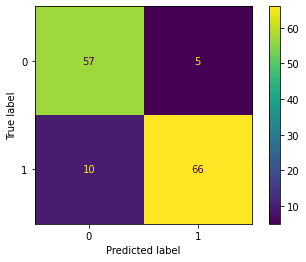

In [ ]:
print('accuracy_score :',metrics.accuracy_score(y_test,y_pred))
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
print("Recall Score:", recall)
metrics.plot_confusion_matrix(neig,x_test,y_test)#plot confusion matrix

#2- SVM

In [ ]:
# Create SVM classifer
svm_model= svm.SVC(  C=0.1, gamma='auto', kernel='rbf',)
# Train SVM Classifer
svm_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
scoring = {
    'accuracy': metrics.make_scorer(metrics.accuracy_score),
    'precision': metrics.make_scorer(metrics.precision_score), 
    'recall': metrics.make_scorer(metrics.recall_score)
    }
params = {'kernel': ['linear', 'rbf','poly'], 'C': [0.1, 1, 10,100,1000], 'gamma': ['scale', 'auto', 0.1, 1,0.01,0.001]}    

In [ ]:
gs = model_selection.GridSearchCV(svm_model, params, scoring=scoring, refit='precision', verbose=3)

In [ ]:
gs.fit(x_norm, y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV]  C=0.1, gamma=scale, kernel=linear, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV]  C=0.1, gamma=scale, kernel=linear, accuracy=0.832, precision=0.918, recall=0.765, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV]  C=0.1, gamma=scale, kernel=linear, accuracy=0.853, precision=0.800, recall=0.980, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV]  C=0.1, gamma=scale, kernel=linear, accuracy=0.842, precision=0.833, recall=0.891, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV]  C=0.1, gamma=scale, kernel=linear, accuracy=0.765, precision=0.815, recall=0.743, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[CV]  C=0.1, gamma=scale, kernel=rbf, accuracy=0.760, precision=0.771, recall=0.802, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV]  C=0.1, gamma=scale, kernel=poly, accuracy=0.859, precision=0.913, recall=0.824, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV]  C=0.1, gamma=scale, kernel=poly, accuracy=0.837, precision=0.875, recall=0.824, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV]  C=0.1, gamma=scale, kernel=poly, accuracy=0.777, precision=0.716, recall=0.990, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV]  C=0.1, gamma=scale, kernel=poly, accuracy=0.836, precision=0.820, recall=0.901, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV]  C=0.1, gamma=scale, kernel=poly, accuracy=0.781, precision=0.828, recall=0.762, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=linear ........

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, gamma=auto, kernel=rbf, accuracy=0.902, precision=0.920, recall=0.902, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.1, gamma=auto, kernel=rbf, accuracy=0.804, precision=0.739, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.1, gamma=auto, kernel=rbf, accuracy=0.820, precision=0.793, recall=0.911, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV]  C=0.1, gamma=auto, kernel=rbf, accuracy=0.760, precision=0.771, recall=0.802, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=poly ..................................
[CV]  C=0.1, gamma=auto, kernel=poly, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=poly ..................................
[CV]  C=0.1, gamma=auto, kernel=poly, accuracy=0.837, precision=0.875, recall=0.824, total=   0.0s
[CV] C=0.1, gamma=auto, kernel=poly ...................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, gamma=0.1, kernel=linear, accuracy=0.853, precision=0.800, recall=0.980, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, accuracy=0.842, precision=0.833, recall=0.891, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, accuracy=0.765, precision=0.815, recall=0.743, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, accuracy=0.891, precision=0.927, recall=0.873, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, accuracy=0.897, precision=0.911, recall=0.902, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, accuracy=0.804, precision=0.739, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, gamma=0.1, kernel=poly, accuracy=0.788, precision=0.727, recall=0.990, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.1, kernel=poly, accuracy=0.831, precision=0.818, recall=0.891, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV]  C=0.1, gamma=0.1, kernel=poly, accuracy=0.781, precision=0.828, recall=0.762, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, accuracy=0.832, precision=0.918, recall=0.765, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, accuracy=0.853, precision=0.800, recall=0.980, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ......................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, gamma=1, kernel=rbf, accuracy=0.560, precision=0.557, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, accuracy=0.557, precision=0.555, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, accuracy=0.563, precision=0.558, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, accuracy=0.799, precision=0.901, recall=0.716, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, accuracy=0.783, precision=0.860, recall=0.725, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, gamma=1, kernel=poly, accuracy=0.772, precision=0.768, recall=0.843, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, accuracy=0.732, precision=0.745, recall=0.782, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, accuracy=0.694, precision=0.778, recall=0.624, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.01, kernel=linear, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.01, kernel=linear, accuracy=0.832, precision=0.918, recall=0.765, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV]  C=0.1, gamma=0.01, kernel=linear, accuracy=0.853, precision=0.800, recall=0.980, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, gamma=0.01, kernel=rbf, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, accuracy=0.842, precision=0.787, recall=0.980, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, accuracy=0.842, precision=0.827, recall=0.901, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, accuracy=0.770, precision=0.804, recall=0.772, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV]  C=0.1, gamma=0.01, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV]  C=0.1, gamma=0.01, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ...................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, gamma=0.001, kernel=linear, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, accuracy=0.832, precision=0.918, recall=0.765, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, accuracy=0.853, precision=0.800, recall=0.980, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, accuracy=0.842, precision=0.833, recall=0.891, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV]  C=0.1, gamma=0.001, kernel=linear, accuracy=0.765, precision=0.815, recall=0.743, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, gamma=0.001, kernel=rbf, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV]  C=0.1, gamma=0.001, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV]  C=0.1, gamma=0.001, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV]  C=0.1, gamma=0.001, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV]  C=0.1, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV]  C=0.1, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=1, gamma=scale, kernel=linear .........

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=scale, kernel=rbf, accuracy=0.870, precision=0.924, recall=0.833, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV]  C=1, gamma=scale, kernel=rbf, accuracy=0.875, precision=0.907, recall=0.863, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV]  C=1, gamma=scale, kernel=rbf, accuracy=0.837, precision=0.773, recall=1.000, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV]  C=1, gamma=scale, kernel=rbf, accuracy=0.820, precision=0.815, recall=0.871, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV]  C=1, gamma=scale, kernel=rbf, accuracy=0.792, precision=0.839, recall=0.772, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...................................
[CV]  C=1, gamma=scale, kernel=poly, accuracy=0.848, precision=0.930, recall=0.784, total=   0.0s
[CV] C=1, gamma=scale, kernel=poly ...........................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=auto, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV]  C=1, gamma=auto, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV]  C=1, gamma=auto, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV]  C=1, gamma=auto, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV]  C=1, gamma=auto, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV]  C=1, gamma=auto, kernel=rbf, accuracy=0.864, precision=0.923, recall=0.824, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=auto, kernel=poly, accuracy=0.842, precision=0.920, recall=0.784, total=   0.0s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV]  C=1, gamma=auto, kernel=poly, accuracy=0.842, precision=0.910, recall=0.794, total=   0.0s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV]  C=1, gamma=auto, kernel=poly, accuracy=0.853, precision=0.810, recall=0.961, total=   0.0s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV]  C=1, gamma=auto, kernel=poly, accuracy=0.831, precision=0.837, recall=0.861, total=   0.0s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV]  C=1, gamma=auto, kernel=poly, accuracy=0.754, precision=0.798, recall=0.743, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...........................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=0.1, kernel=rbf, accuracy=0.864, precision=0.923, recall=0.824, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, accuracy=0.875, precision=0.907, recall=0.863, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, accuracy=0.832, precision=0.767, recall=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, accuracy=0.814, precision=0.807, recall=0.871, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, accuracy=0.792, precision=0.839, recall=0.772, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, accuracy=0.832, precision=0.918, recall=0.765, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=1, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, accuracy=0.837, precision=0.805, recall=0.931, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=1, kernel=rbf, accuracy=0.701, precision=0.650, recall=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, accuracy=0.716, precision=0.671, recall=0.950, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, accuracy=0.683, precision=0.659, recall=0.881, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV]  C=1, gamma=1, kernel=poly, accuracy=0.793, precision=0.872, recall=0.735, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=poly, accuracy=0.755, precision=0.843, recall=0.686, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV]  C=1, gamma=1, kernel=poly, accuracy=0.761, precision=0.769, recall=0.814, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV]  C=1, gamma=1, kernel=poly, accuracy=0.721, precision=0.745, recall=0.752, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=1, kernel=poly, accuracy=0.656, precision=0.744, recall=0.574, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .......................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=0.01, kernel=rbf, accuracy=0.760, precision=0.800, recall=0.752, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear ...........................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=0.001, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, accuracy=0.853, precision=0.903, recall=0.824, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, accuracy=0.837, precision=0.909, recall=0.784, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, accuracy=0.853, precision=0.800, recall=0.980, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, accuracy=0.847, precision=0.835, recall=0.901, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, accuracy=0.765, precision=0.802, recall=0.762, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly .........................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV]  C=10, gamma=scale, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.1s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV]  C=10, gamma=scale, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.1s
[CV] C=10, gamma=scale, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=scale, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.1s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV]  C=10, gamma=scale, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.1s
[CV] C=10, gamma=scale, kernel=linear ................................
[CV]  C=10, gamma=scale, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................
[CV]  C=10, gamma=scale, kernel=rbf, accuracy=0.815, precision=0.915, recall=0.735, total=   0.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................
[CV]  C=10, gamma=scale, kernel=rbf, accuracy=0.815, precision=0.862, recall=0.794, total=   0.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=scale, kernel=rbf, accuracy=0.837, precision=0.786, recall=0.971, total=   0.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................
[CV]  C=10, gamma=scale, kernel=rbf, accuracy=0.798, precision=0.786, recall=0.871, total=   0.0s
[CV] C=10, gamma=scale, kernel=rbf ...................................
[CV]  C=10, gamma=scale, kernel=rbf, accuracy=0.765, precision=0.822, recall=0.733, total=   0.0s
[CV] C=10, gamma=scale, kernel=poly ..................................
[CV]  C=10, gamma=scale, kernel=poly, accuracy=0.826, precision=0.907, recall=0.765, total=   0.0s
[CV] C=10, gamma=scale, kernel=poly ..................................
[CV]  C=10, gamma=scale, kernel=poly, accuracy=0.799, precision=0.874, recall=0.745, total=   0.0s
[CV] C=10, gamma=scale, kernel=poly ..................................
[CV]  C=10, gamma=scale, kernel=poly, accuracy=0.810, precision=0.786, recall=0.902, total=   0.0s
[CV] C=10, gamma=scale, kernel=poly ..................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=auto, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV]  C=10, gamma=auto, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV]  C=10, gamma=auto, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=auto, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear .................................
[CV]  C=10, gamma=auto, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=auto, kernel=rbf, accuracy=0.815, precision=0.915, recall=0.735, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=auto, kernel=rbf, accuracy=0.815, precision=0.870, recall=0.784, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=auto, kernel=rbf, accuracy=0.837, precision=0.786, recall=0.971, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV]  C=10, gamma=auto, kernel=rbf, accuracy=0.792, precision=0.784, recall=0.861, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf .......................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=auto, kernel=poly, accuracy=0.826, precision=0.907, recall=0.765, total=   0.0s
[CV] C=10, gamma=auto, kernel=poly ...................................
[CV]  C=10, gamma=auto, kernel=poly, accuracy=0.793, precision=0.872, recall=0.735, total=   0.0s
[CV] C=10, gamma=auto, kernel=poly ...................................
[CV]  C=10, gamma=auto, kernel=poly, accuracy=0.810, precision=0.786, recall=0.902, total=   0.0s
[CV] C=10, gamma=auto, kernel=poly ...................................
[CV]  C=10, gamma=auto, kernel=poly, accuracy=0.787, precision=0.792, recall=0.832, total=   0.0s
[CV] C=10, gamma=auto, kernel=poly ...................................
[CV]  C=10, gamma=auto, kernel=poly, accuracy=0.667, precision=0.744, recall=0.604, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ....................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=0.1, kernel=rbf, accuracy=0.842, precision=0.920, recall=0.784, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, accuracy=0.815, precision=0.862, recall=0.794, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, accuracy=0.832, precision=0.780, recall=0.971, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, accuracy=0.803, precision=0.798, recall=0.861, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, accuracy=0.754, precision=0.818, recall=0.713, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, accuracy=0.815, precision=0.905, recall=0.745, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ..................................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=0.1, kernel=poly, accuracy=0.792, precision=0.800, recall=0.832, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, accuracy=0.694, precision=0.785, recall=0.614, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=1, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, accuracy=0.821, precision=0.800, recall=0.902, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=1, kernel=rbf, accuracy=0.875, precision=0.832, recall=0.971, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, accuracy=0.701, precision=0.650, recall=1.000, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, accuracy=0.699, precision=0.669, recall=0.901, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, accuracy=0.710, precision=0.690, recall=0.861, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, accuracy=0.793, precision=0.881, recall=0.725, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, accuracy=0.761, precision=0.822, recall=0.725, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=poly, accuracy=0.721, precision=0.745, recall=0.752, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, accuracy=0.656, precision=0.744, recall=0.574, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.01, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, accuracy=0.859, precision=0.913, recall=0.824, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=0.01, kernel=rbf, accuracy=0.832, precision=0.918, recall=0.765, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, accuracy=0.853, precision=0.791, recall=1.000, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, accuracy=0.820, precision=0.815, recall=0.871, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, accuracy=0.776, precision=0.849, recall=0.723, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, accuracy=0.707, precision=0.654, recall=1.000, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, accuracy=0.652, precision=0.616, recall=0.990, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ..........................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, accuracy=0.826, precision=0.917, recall=0.755, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, accuracy=0.864, precision=0.808, recall=0.990, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, accuracy=0.847, precision=0.841, recall=0.891, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, gamma=0.001, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=100, gamma=scale, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.5s
[CV] C=100, gamma=scale, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.6s
[CV] C=100, gamma=scale, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.5s
[CV] C=100, gamma=scale, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.5s
[CV] C=100, gamma=scale, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=scale, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.5s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV]  C=100, gamma=scale, kernel=rbf, accuracy=0.804, precision=0.902, recall=0.725, total=   0.0s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV]  C=100, gamma=scale, kernel=rbf, accuracy=0.832, precision=0.866, recall=0.824, total=   0.0s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV]  C=100, gamma=scale, kernel=rbf, accuracy=0.804, precision=0.770, recall=0.922, total=   0.0s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV]  C=100, gamma=scale, kernel=rbf, accuracy=0.787, precision=0.782, recall=0.851, total=   0.0s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV]  C=100, gamma=scale, kernel=rbf, accuracy=0.721, precision=0.772, recall=0.703, total=   0.0s
[CV] C=100, gamma=scale, kernel=poly ...........

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=scale, kernel=poly, accuracy=0.783, precision=0.897, recall=0.686, total=   0.1s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV]  C=100, gamma=scale, kernel=poly, accuracy=0.772, precision=0.857, recall=0.706, total=   0.1s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV]  C=100, gamma=scale, kernel=poly, accuracy=0.783, precision=0.787, recall=0.833, total=   0.0s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV]  C=100, gamma=scale, kernel=poly, accuracy=0.732, precision=0.745, recall=0.782, total=   0.0s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV]  C=100, gamma=scale, kernel=poly, accuracy=0.694, precision=0.778, recall=0.624, total=   0.0s
[CV] C=100, gamma=auto, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=auto, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.6s
[CV] C=100, gamma=auto, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.6s
[CV] C=100, gamma=auto, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.5s
[CV] C=100, gamma=auto, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.5s
[CV] C=100, gamma=auto, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=auto, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.6s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=100, gamma=auto, kernel=rbf, accuracy=0.804, precision=0.902, recall=0.725, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=100, gamma=auto, kernel=rbf, accuracy=0.832, precision=0.866, recall=0.824, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=100, gamma=auto, kernel=rbf, accuracy=0.804, precision=0.770, recall=0.922, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=100, gamma=auto, kernel=rbf, accuracy=0.787, precision=0.782, recall=0.851, total=   0.0s
[CV] C=100, gamma=auto, kernel=rbf ...................................
[CV]  C=100, gamma=auto, kernel=rbf, accuracy=0.721, precision=0.772, recall=0.703, total=   0.0s
[CV] C=100, gamma=auto, kernel=poly ..................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=auto, kernel=poly, accuracy=0.793, precision=0.900, recall=0.706, total=   0.1s
[CV] C=100, gamma=auto, kernel=poly ..................................
[CV]  C=100, gamma=auto, kernel=poly, accuracy=0.772, precision=0.857, recall=0.706, total=   0.1s
[CV] C=100, gamma=auto, kernel=poly ..................................
[CV]  C=100, gamma=auto, kernel=poly, accuracy=0.777, precision=0.785, recall=0.824, total=   0.0s
[CV] C=100, gamma=auto, kernel=poly ..................................
[CV]  C=100, gamma=auto, kernel=poly, accuracy=0.732, precision=0.745, recall=0.782, total=   0.0s
[CV] C=100, gamma=auto, kernel=poly ..................................
[CV]  C=100, gamma=auto, kernel=poly, accuracy=0.705, precision=0.783, recall=0.644, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=0.1, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.5s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.6s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.5s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.5s
[CV] C=100, gamma=0.1, kernel=linear .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.5s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, accuracy=0.810, precision=0.904, recall=0.735, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, accuracy=0.826, precision=0.865, recall=0.814, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, accuracy=0.799, precision=0.769, recall=0.912, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, accuracy=0.781, precision=0.775, recall=0.851, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, accuracy=0.738, precision=0.791, recall=0.713, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly .........................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=0.1, kernel=poly, accuracy=0.799, precision=0.901, recall=0.716, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, accuracy=0.783, precision=0.860, recall=0.725, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, accuracy=0.772, precision=0.768, recall=0.843, total=   0.1s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, accuracy=0.732, precision=0.745, recall=0.782, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=0.1, kernel=poly, accuracy=0.694, precision=0.778, recall=0.624, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.6s
[CV] C=100, gamma=1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.6s
[CV] C=100, gamma=1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.5s
[CV] C=100, gamma=1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.5s
[CV] C=100, gamma=1, kernel=linear ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.5s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, accuracy=0.821, precision=0.800, recall=0.902, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, accuracy=0.875, precision=0.832, recall=0.971, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, accuracy=0.701, precision=0.650, recall=1.000, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, accuracy=0.699, precision=0.669, recall=0.901, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=1, kernel=rbf, accuracy=0.710, precision=0.690, recall=0.861, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV]  C=100, gamma=1, kernel=poly, accuracy=0.793, precision=0.881, recall=0.725, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV]  C=100, gamma=1, kernel=poly, accuracy=0.761, precision=0.822, recall=0.725, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=poly, accuracy=0.772, precision=0.783, recall=0.814, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV]  C=100, gamma=1, kernel=poly, accuracy=0.721, precision=0.745, recall=0.752, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV]  C=100, gamma=1, kernel=poly, accuracy=0.656, precision=0.744, recall=0.574, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.6s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.6s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.5s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.5s
[CV] C=100, gamma=0.01, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, accuracy=0.848, precision=0.911, recall=0.804, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, accuracy=0.832, precision=0.771, recall=0.990, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, accuracy=0.798, precision=0.786, recall=0.871, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, accuracy=0.776, precision=0.841, recall=0.733, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=0.01, kernel=poly, accuracy=0.788, precision=0.727, recall=0.990, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, accuracy=0.831, precision=0.818, recall=0.891, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, accuracy=0.781, precision=0.828, recall=0.762, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   0.6s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   0.6s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   0.5s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   0.5s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   0.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, accuracy=0.848, precision=0.911, recall=0.804, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, accuracy=0.832, precision=0.918, recall=0.765, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, accuracy=0.864, precision=0.813, recall=0.980, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, accuracy=0.831, precision=0.824, recall=0.881, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, accuracy=0.770, precision=0.824, recall=0.743, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly ...........

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=1000, gamma=scale, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=scale, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   5.4s
[CV] C=1000, gamma=scale, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=scale, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   6.0s
[CV] C=1000, gamma=scale, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=scale, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   6.6s
[CV] C=1000, gamma=scale, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=scale, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   5.2s
[CV] C=1000, gamma=scale, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=scale, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   2.9s
[CV] C=1000, gamma=scale, kernel=rbf .................................
[CV]  C=1000, gamma=scale, kernel=rbf, accuracy=0.783, precision=0.887, recall=0.696, total=   0.0s
[CV] C=1000, gamma=scale, kernel=rbf .................................
[CV]  C=1000, gamma=scale, kernel=rbf, accuracy=0.815, precision=0.840, recall=0.824, total=   0.0s
[CV] C=1000, gamma=scale, kernel=rbf .................................
[CV]  C=1000, gamma=scale, kernel=rbf, accuracy=0.815, precision=0.788, recall=0.912, total=   0.0s
[CV] C=1000, gamma=scale, kernel=rbf .................................
[CV]  C=1000, gamma=scale, kernel=rbf, accuracy=0.776, precision=0.768, recall=0.851, total=   0.0s
[CV] C=1000, gamma=scale, kernel=rbf .................................
[CV]  C=1000, gamma=scale, kernel=rbf, accuracy=0.716, precision=0.763, recall=0.703, total=   0.0s
[CV] C=1000, gamma=scale, kernel=poly ....

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1000, gamma=scale, kernel=poly, accuracy=0.799, precision=0.892, recall=0.725, total=   0.1s
[CV] C=1000, gamma=scale, kernel=poly ................................
[CV]  C=1000, gamma=scale, kernel=poly, accuracy=0.761, precision=0.845, recall=0.696, total=   0.1s
[CV] C=1000, gamma=scale, kernel=poly ................................
[CV]  C=1000, gamma=scale, kernel=poly, accuracy=0.766, precision=0.776, recall=0.814, total=   0.1s
[CV] C=1000, gamma=scale, kernel=poly ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=scale, kernel=poly, accuracy=0.727, precision=0.752, recall=0.752, total=   0.1s
[CV] C=1000, gamma=scale, kernel=poly ................................
[CV]  C=1000, gamma=scale, kernel=poly, accuracy=0.667, precision=0.750, recall=0.594, total=   0.1s
[CV] C=1000, gamma=auto, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=auto, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   6.0s
[CV] C=1000, gamma=auto, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=auto, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   6.6s
[CV] C=1000, gamma=auto, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=auto, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   6.6s
[CV] C=1000, gamma=auto, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=auto, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   5.2s
[CV] C=1000, gamma=auto, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=auto, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   2.8s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=1000, gamma=auto, kernel=rbf, accuracy=0.783, precision=0.887, recall=0.696, total=   0.0s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=1000, gamma=auto, kernel=rbf, accuracy=0.815, precision=0.840, recall=0.824, total=   0.0s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=1000, gamma=auto, kernel=rbf, accuracy=0.815, precision=0.788, recall=0.912, total=   0.0s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=1000, gamma=auto, kernel=rbf, accuracy=0.776, precision=0.768, recall=0.851, total=   0.0s
[CV] C=1000, gamma=auto, kernel=rbf ..................................
[CV]  C=1000, gamma=auto, kernel=rbf, accuracy=0.716, precision=0.763, recall=0.703, total=   0.0s
[CV] C=1000, gamma=auto, kernel=poly ...........

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1000, gamma=auto, kernel=poly, accuracy=0.788, precision=0.880, recall=0.716, total=   0.1s
[CV] C=1000, gamma=auto, kernel=poly .................................
[CV]  C=1000, gamma=auto, kernel=poly, accuracy=0.761, precision=0.845, recall=0.696, total=   0.1s
[CV] C=1000, gamma=auto, kernel=poly .................................
[CV]  C=1000, gamma=auto, kernel=poly, accuracy=0.766, precision=0.776, recall=0.814, total=   0.1s
[CV] C=1000, gamma=auto, kernel=poly .................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=auto, kernel=poly, accuracy=0.727, precision=0.752, recall=0.752, total=   0.1s
[CV] C=1000, gamma=auto, kernel=poly .................................
[CV]  C=1000, gamma=auto, kernel=poly, accuracy=0.661, precision=0.741, recall=0.594, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   5.4s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   5.9s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   6.6s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   5.3s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   2.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, accuracy=0.788, precision=0.889, recall=0.706, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, accuracy=0.810, precision=0.838, recall=0.814, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, accuracy=0.815, precision=0.788, recall=0.912, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, accuracy=0.770, precision=0.761, recall=0.851, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, accuracy=0.727, precision=0.768, recall=0.723, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1000, gamma=0.1, kernel=poly, accuracy=0.793, precision=0.872, recall=0.735, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, accuracy=0.755, precision=0.843, recall=0.686, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, accuracy=0.761, precision=0.769, recall=0.814, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=poly, accuracy=0.721, precision=0.745, recall=0.752, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, accuracy=0.656, precision=0.744, recall=0.574, total=   0.1s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   5.5s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   5.9s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   6.6s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   5.2s
[CV] C=1000, gamma=1, kernel=linear ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   2.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, accuracy=0.821, precision=0.800, recall=0.902, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, accuracy=0.875, precision=0.832, recall=0.971, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, accuracy=0.701, precision=0.650, recall=1.000, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, accuracy=0.699, precision=0.669, recall=0.901, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1000, gamma=1, kernel=rbf, accuracy=0.710, precision=0.690, recall=0.861, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, accuracy=0.793, precision=0.881, recall=0.725, total=   0.1s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, accuracy=0.761, precision=0.822, recall=0.725, total=   0.1s
[CV] C=1000, gamma=1, kernel=poly ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=poly, accuracy=0.772, precision=0.783, recall=0.814, total=   0.1s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, accuracy=0.721, precision=0.745, recall=0.752, total=   0.1s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, accuracy=0.656, precision=0.744, recall=0.574, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   5.4s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   5.9s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   6.6s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   5.2s
[CV] C=1000, gamma=0.01, kernel=linear ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   2.8s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, accuracy=0.826, precision=0.917, recall=0.755, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=rbf, accuracy=0.826, precision=0.880, recall=0.794, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, accuracy=0.821, precision=0.776, recall=0.951, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, accuracy=0.770, precision=0.766, recall=0.842, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1000, gamma=0.01, kernel=rbf, accuracy=0.743, precision=0.807, recall=0.703, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, accuracy=0.832, precision=0.918, recall=0.765, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, accuracy=0.826, precision=0.907, recall=0.765, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, accuracy=0.859, precision=0.811, recall=0.971, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, accuracy=0.820, precision=0.821, recall=0.861, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV]  C=1000, gamma=0.01, kernel=poly, accuracy=0.738, precision=0.791, recall=0.713, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=linear ......

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1000, gamma=0.001, kernel=linear, accuracy=0.859, precision=0.913, recall=0.824, total=   5.5s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.001, kernel=linear, accuracy=0.832, precision=0.908, recall=0.775, total=   6.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.001, kernel=linear, accuracy=0.859, precision=0.806, recall=0.980, total=   6.6s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.001, kernel=linear, accuracy=0.847, precision=0.835, recall=0.901, total=   5.2s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.001, kernel=linear, accuracy=0.749, precision=0.802, recall=0.723, total=   2.8s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, accuracy=0.853, precision=0.912, recall=0.814, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, accuracy=0.848, precision=0.920, recall=0.794, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, accuracy=0.848, precision=0.789, recall=0.990, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, accuracy=0.820, precision=0.815, recall=0.871, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, accuracy=0.776, precision=0.849, recall=0.723, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ....

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1000, gamma=0.001, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, accuracy=0.554, precision=0.554, recall=1.000, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, accuracy=0.552, precision=0.552, recall=1.000, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  3.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was exp

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.1, 1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit='precision',
             return_train_score=False,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=3)

In [ ]:
print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
y_pred=svm_model.predict(x_test)#Predict the response for test dataset

##testing

accuracy_score: 0.9130434782608695
Precision Score: 0.9130434782608695
Recall Score: 0.9130434782608695


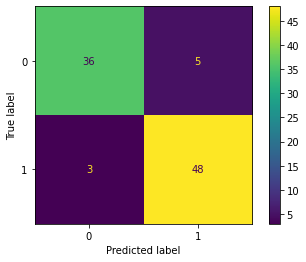

In [ ]:
print('accuracy_score:' ,metrics.accuracy_score(y_test,y_pred))# Model Accuracy
precision = metrics.precision_score(y_test, y_pred,average='micro')
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, y_pred,average='micro')
print("Recall Score:", recall)
metrics.plot_confusion_matrix(svm_model,x_test,y_test)#plot confusion matrix

#3- Decision Tree

In [ ]:
# Create Decision Tree classifer 
model_tree = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, splitter= 'random')
# Train Decision Tree Classifer
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
scoring = {
    'accuracy': metrics.make_scorer(metrics.accuracy_score),
    'precision': metrics.make_scorer(metrics.precision_score), 
    'recall': metrics.make_scorer(metrics.recall_score)
    }
   
params = {'splitter':['best','random'],
            'max_depth': [1,3,5,7,9,11,12],
           'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
           
          
          
 

    
          }
   

gs = model_selection.GridSearchCV(model_tree, params, scoring=scoring, refit='recall', verbose=3)

In [ ]:
gs.fit(x_norm,y)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, accuracy=0.946, precision=0.911, recall=1.000, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, accuracy=0.804, precision=0.912, recall=0.716, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, accuracy=0.848, precision=0.836, recall=0.902, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, accuracy=0.776, precision=0.763, recall=0.861, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=1, splitter=best, accuracy=0.694, precision=0.710, recall=0.752, total=   0.0s
[CV] ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=4, splitter=best, accuracy=0.848, precision=0.836, recall=0.902, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=4, splitter=best, accuracy=0.776, precision=0.763, recall=0.861, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=best ..................
[CV]  max_depth=1, min_samples_leaf=4, splitter=best, accuracy=0.694, precision=0.710, recall=0.752, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=4, splitter=random, accuracy=0.946, precision=0.911, recall=1.000, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=4, splitter=random, accuracy=0.750, precision=0.900, recall=0.618, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, splitter=random ................
[CV]  max_depth=1, min_samples_leaf=4, splitter=random, accuracy=0

[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    5.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=8,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='random'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
             

In [ ]:
print("Best Hyperparameters:", gs.best_params_)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 9, 'splitter': 'best'}


In [ ]:
#Predict the response for test dataset
y_pred=model_tree.predict(x_test)

##testing

acc is 0.8695652173913043
precision_score is 0.8695652173913043
recall_score is 0.8695652173913043
f1_score is 0.8695652173913043


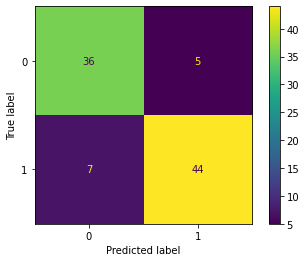

In [ ]:
acc=metrics.accuracy_score(y_test,y_pred)
precision_score=metrics.precision_score(y_test,y_pred,average='micro')
recall_score=metrics.recall_score(y_test,y_pred,average='micro')
f1_score=metrics.f1_score(y_test,y_pred,average='micro')
print(f'acc is {acc}')
print(f'precision_score is {precision_score}')
print(f'recall_score is {recall_score}')
print(f'f1_score is {f1_score}')
metrics.plot_confusion_matrix(model_tree,x_test,y_test)

#4- Logistic Regression

In [ ]:
#create Logistic Regression
model_logis = linear_model.LogisticRegression(C= 0.001, fit_intercept= True, solver='sag')
#train the model
model_logis.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
scoring = {
    'accuracy': metrics.make_scorer(metrics.accuracy_score),
    'precision': metrics.make_scorer(metrics.precision_score), 
    'recall': metrics.make_scorer(metrics.recall_score)
    }
   
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'solver': ['svd', 'cholesky', 'lsqr', 'sag'],
          'fit_intercept':[True, False]
          
          
 

    
          }
   

gs = model_selection.GridSearchCV(model_logis, params, scoring=scoring, refit='recall', verbose=3)

In [ ]:
gs.fit(x_norm,y)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] C=0.001, fit_intercept=True, solver=svd .........................
[CV]  C=0.001, fit_intercept=True, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.001, fit_intercept=True, solver=svd .........................
[CV]  C=0.001, fit_intercept=True, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.001, fit_intercept=True, solver=svd .........................
[CV]  C=0.001, fit_intercept=True, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.001, fit_intercept=True, solver=svd .........................
[CV]  C=0.001, fit_intercept=True, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.001, fit_intercept=True, solver=svd .........................
[CV]  C=0.001, fit_intercept=True, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.001, fit_intercept=True, solver=cholesky ....................
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got svd.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got cholesky.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mod

[CV]  C=0.01, fit_intercept=True, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.01, fit_intercept=True, solver=cholesky .....................
[CV]  C=0.01, fit_intercept=True, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.01, fit_intercept=True, solver=cholesky .....................
[CV]  C=0.01, fit_intercept=True, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.01, fit_intercept=True, solver=lsqr .........................
[CV]  C=0.01, fit_intercept=True, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.01, fit_intercept=True, solver=lsqr .........................
[CV]  C=0.01, fit_intercept=True, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.01, fit_intercept=True, solver=lsqr .........................
[CV]  C=0.01, fit_intercept=True, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.01, fit_inte

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, fit_intercept=True, solver=sag, accuracy=0.821, precision=0.763, recall=0.980, total=   0.0s
[CV] C=0.1, fit_intercept=True, solver=sag ...........................
[CV]  C=0.1, fit_intercept=True, solver=sag, accuracy=0.820, precision=0.815, recall=0.871, total=   0.0s
[CV] C=0.1, fit_intercept=True, solver=sag ...........................
[CV]  C=0.1, fit_intercept=True, solver=sag, accuracy=0.754, precision=0.833, recall=0.693, total=   0.0s
[CV] C=0.1, fit_intercept=False, solver=svd ..........................
[CV]  C=0.1, fit_intercept=False, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.1, fit_intercept=False, solver=svd ..........................
[CV]  C=0.1, fit_intercept=False, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.1, fit_intercept=False, solver=svd ..........................
[CV]  C=0.1, fit_intercept=False, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=0.1, fit_intercep

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got svd.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got cholesky.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-

[CV]  C=1, fit_intercept=False, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=1, fit_intercept=False, solver=cholesky .......................
[CV]  C=1, fit_intercept=False, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=1, fit_intercept=False, solver=cholesky .......................
[CV]  C=1, fit_intercept=False, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=1, fit_intercept=False, solver=cholesky .......................
[CV]  C=1, fit_intercept=False, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=1, fit_intercept=False, solver=cholesky .......................
[CV]  C=1, fit_intercept=False, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=1, fit_intercept=False, solver=lsqr ...........................
[CV]  C=1, fit_intercept=False, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=1, fit_intercept=F

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=10, fit_intercept=False, solver=cholesky, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=10, fit_intercept=False, solver=lsqr ..........................
[CV]  C=10, fit_intercept=False, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=10, fit_intercept=False, solver=lsqr ..........................
[CV]  C=10, fit_intercept=False, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=10, fit_intercept=False, solver=lsqr ..........................
[CV]  C=10, fit_intercept=False, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=10, fit_intercept=False, solver=lsqr ..........................
[CV]  C=10, fit_intercept=False, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=10, fit_intercept=False, solver=lsqr ..........................
[CV]  C=10, fit_intercept=False, solver=lsqr, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=10, fit_intercept=False, sol

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=100, fit_intercept=False, solver=sag, accuracy=0.810, precision=0.935, recall=0.706, total=   0.0s
[CV] C=100, fit_intercept=False, solver=sag ..........................
[CV]  C=100, fit_intercept=False, solver=sag, accuracy=0.788, precision=0.899, recall=0.696, total=   0.0s
[CV] C=100, fit_intercept=False, solver=sag ..........................
[CV]  C=100, fit_intercept=False, solver=sag, accuracy=0.853, precision=0.821, recall=0.941, total=   0.0s
[CV] C=100, fit_intercept=False, solver=sag ..........................
[CV]  C=100, fit_intercept=False, solver=sag, accuracy=0.803, precision=0.835, recall=0.802, total=   0.0s
[CV] C=100, fit_intercept=False, solver=sag ..........................
[CV]  C=100, fit_intercept=False, solver=sag, accuracy=0.743, precision=0.855, recall=0.644, total=   0.0s
[CV] C=1000, fit_intercept=True, solver=svd ..........................
[CV]  C=1000, fit_intercept=True, solver=svd, accuracy=nan, precision=nan, recall=nan, total=   0.0s
[CV] C=10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Valu

[CV]  C=1000, fit_intercept=False, solver=sag, accuracy=0.810, precision=0.935, recall=0.706, total=   0.0s
[CV] C=1000, fit_intercept=False, solver=sag .........................
[CV]  C=1000, fit_intercept=False, solver=sag, accuracy=0.788, precision=0.899, recall=0.696, total=   0.0s
[CV] C=1000, fit_intercept=False, solver=sag .........................
[CV]  C=1000, fit_intercept=False, solver=sag, accuracy=0.853, precision=0.821, recall=0.941, total=   0.0s
[CV] C=1000, fit_intercept=False, solver=sag .........................
[CV]  C=1000, fit_intercept=False, solver=sag, accuracy=0.803, precision=0.835, recall=0.802, total=   0.0s
[CV] C=1000, fit_intercept=False, solver=sag .........................
[CV]  C=1000, fit_intercept=False, solver=sag, accuracy=0.743, precision=0.855, recall=0.644, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=0.001, class_weight=None,
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='sag',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             pre_dispatch='2*n_jobs', refit='recall', return_train_score=False,
             scoring={'accuracy': make_scorer(accuracy_score),
         

In [ ]:
print("Best Hyperparameters:", gs.best_params_)
print("Best Score (Recall): ", gs.best_score_)

Best Hyperparameters: {'C': 0.001, 'fit_intercept': True, 'solver': 'sag'}
Best Score (Recall):  0.8896524946612308


In [ ]:
y_pred = model_logis.predict(x_test) #predict output

##testing

accuracy_score is 0.8586956521739131
precision_score is 0.8653846153846154
recall_score is 0.8823529411764706
f1_score is 0.8737864077669903


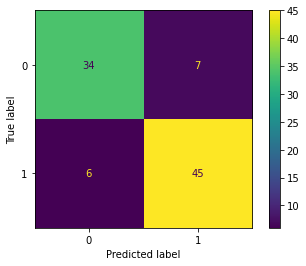

In [ ]:
acc=metrics.accuracy_score(y_test,y_pred)
precision_score=metrics.precision_score(y_test,y_pred)
recall_score=metrics.recall_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
print(f'accuracy_score is {acc}')
print(f'precision_score is {precision_score}')
print(f'recall_score is {recall_score}')
print(f'f1_score is {f1_score}')
metrics.plot_confusion_matrix(model_logis,x_test,y_test)

#5- DNN

In [ ]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

In [ ]:
# Initialize the constructor
model = Sequential()

In [ ]:
# Add an input layer 
model.add(Dense(16,activation='relu',kernel_initializer='normal', input_shape=(11,)))# Add one hidden layer 
tf.keras.layers.Dropout(0.25)
model.add(Dense(32, activation='relu',kernel_initializer='normal'))
tf.keras.layers.Dropout(0.2)

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_87 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 33        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'],
              )
                   
model.fit(x_train, y_train,epochs=20, batch_size=10, verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
74/74 [==============================] - 1s 4ms/step - loss: 0.6054 - accuracy: 0.7834 - val_loss: 0.4678 - val_accuracy: 0.8804
Epoch 2/20
74/74 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8433 - val_loss: 0.3306 - val_accuracy: 0.8967
Epoch 3/20
74/74 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8488 - val_loss: 0.3069 - val_accuracy: 0.9185
Epoch 4/20
74/74 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8624 - val_loss: 0.2971 - val_accuracy: 0.9076
Epoch 5/20
74/74 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8651 - val_loss: 0.2974 - val_accuracy: 0.9022
Epoch 6/20
74/74 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8665 - val_loss: 0.2935 - val_accuracy: 0.8967
Epoch 7/20
74/74 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8719 - val_loss: 0.2913 - val_accuracy: 0.8967
Epoch 8/20
74/74 [==

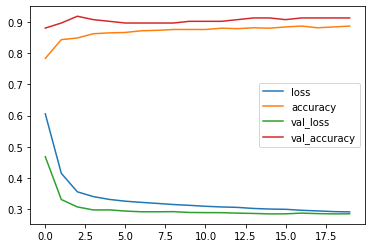

In [ ]:
hist=pd.DataFrame(model.history.history)#plot history
hist.plot()

In [ ]:
pred = model.predict(x_test)##test the model on the test dataset 
pred = np.round(pred).astype(int)

In [ ]:
print('accuracy_score :',metrics.accuracy_score(y_test,pred))
precision = metrics.precision_score(y_test, pred)
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, pred)
print("Recall Score:", recall)


accuracy_score : 0.9130434782608695
Precision Score: 0.9056603773584906
Recall Score: 0.9411764705882353
